In [232]:
import pandas as pd
import matplotlib.pyplot as plt

In [233]:
reviews = pd.read_csv("reviews.csv")
reviews.head()

,review_id,review_url,location_id,hotel_name,city,timestamp,rating,title,text,travel_date,username,value_rating,room_rating,location_rating,cleanliness_rating,service_rating,sleep_rating
0,1016464488,https://www.tripadvisor.com/ShowUserReviews-g2...,11953119,Nh Collection Colombo,Colombo,2025-07-04T05:58:58Z,1,not a good stay,Found lighters in the toilet paper rolls in a ...,2025-06-30,Curious04015869441,NaN,NaN,NaN,NaN,NaN,NaN
1,1016435128,https://www.tripadvisor.com/ShowUserReviews-g2...,11953119,Nh Collection Colombo,Colombo,2025-07-04T01:38:54Z,5,Definitely recommend!,The hotel is just excellent! The food is so go...,2025-07-31,742saltanata,5.0,5.0,5.0,5.0,5.0,5.0
2,1016307864,https://www.tripadvisor.com/ShowUserReviews-g2...,11953119,Nh Collection Colombo,Colombo,2025-07-03T05:15:10Z,5,Wonderful stay,Comfortable stay..cooperative staff..fast serv...,2025-07-31,847shivanig,5.0,5.0,5.0,5.0,4.0,5.0
3,1016165618,https://www.tripadvisor.com/ShowUserReviews-g2...,11953119,Nh Collection Colombo,Colombo,2025-07-02T06:36:14Z,5,My favorite 4+ star hotel in Colombo,"We live in New York area, but my spouse is fam...",2025-07-31,jacksF8984QN,NaN,NaN,NaN,NaN,NaN,NaN
4,1015472232,https://www.tripadvisor.com/ShowUserReviews-g2...,11953119,Nh Collection Colombo,Colombo,2025-06-28T00:50:47Z,5,Excellent food and stay,Excellent food especially indian corner lot of...,2025-06-30,Vinayaksahni,5.0,5.0,5.0,5.0,5.0,5.0


In [234]:
reviews.shape

(7367, 17)

In [235]:
reviews.nunique()

review_id             5186
review_url            5186
location_id            566
hotel_name             563
city                   161
timestamp             5186
rating                   5
title                 4691
text                  5186
travel_date            181
username              5019
value_rating             5
room_rating              5
location_rating          5
cleanliness_rating       5
service_rating           5
sleep_rating             5
dtype: int64

In [236]:
reviews = reviews.drop_duplicates()

In [237]:
reviews.shape

(5186, 17)

In [238]:
reviews.isnull().sum()

review_id                0
review_url               0
location_id              0
hotel_name               0
city                     0
timestamp                0
rating                   0
title                    0
text                     0
travel_date              6
username                 1
value_rating          2468
room_rating           2483
location_rating       2528
cleanliness_rating    3537
service_rating        3587
sleep_rating          3648
dtype: int64

In [239]:
reviews["location_id"].unique().shape[0]

566

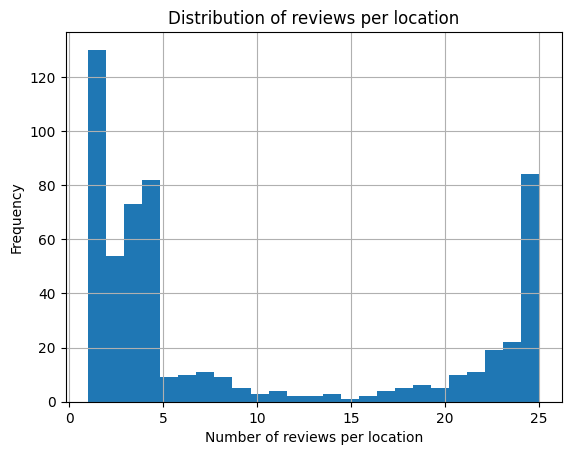

In [240]:
reviews["location_id"].value_counts().hist(bins=25)

plt.xlabel("Number of reviews per location")
plt.ylabel("Frequency")
plt.title("Distribution of reviews per location")
plt.show()

In [241]:
reviews["city"].unique().shape[0]

161

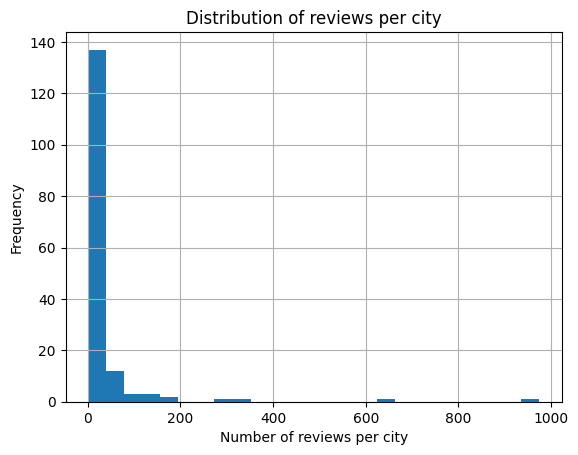

In [242]:
reviews["city"].value_counts().hist(bins=25)

plt.xlabel("Number of reviews per city")
plt.ylabel("Frequency")
plt.title("Distribution of reviews per city")
plt.show()

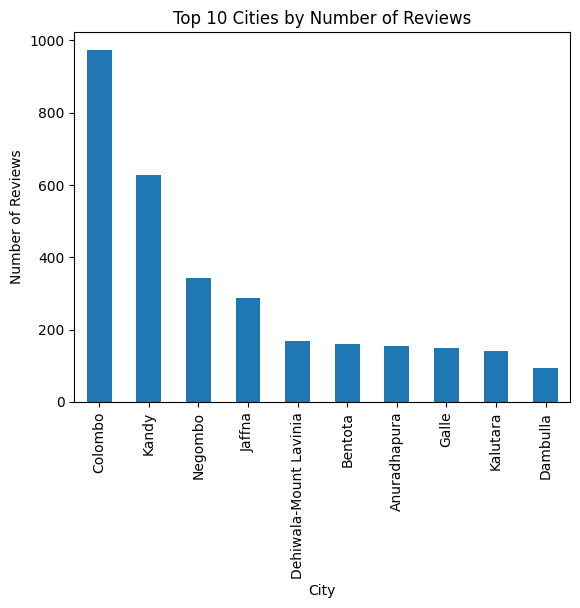

In [243]:
top_cities = reviews["city"].value_counts().head(10)

top_cities.plot(kind='bar')
plt.xlabel("City")
plt.ylabel("Number of Reviews")
plt.title("Top 10 Cities by Number of Reviews")
plt.show()

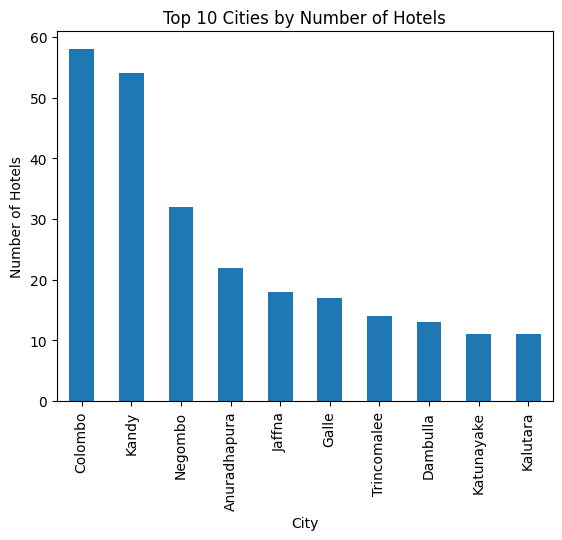

In [244]:
hotels_per_city = reviews.groupby("city")["location_id"].nunique().sort_values(ascending=False)
hotels_per_city.head(10).plot(kind='bar')
plt.xlabel("City")
plt.ylabel("Number of Hotels")
plt.title("Top 10 Cities by Number of Hotels")
plt.show()

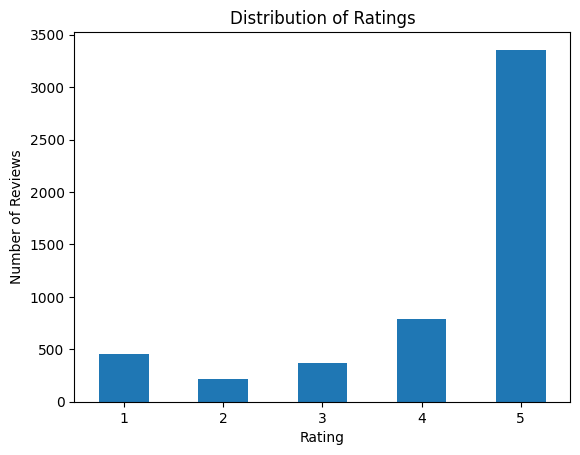

In [245]:
reviews["rating"].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Ratings")
plt.xticks(rotation=0)
plt.show()

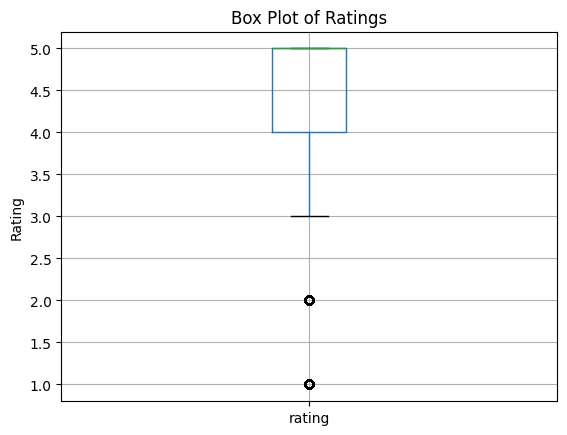

In [246]:
# box plot of ratings
reviews.boxplot(column="rating")
plt.ylabel("Rating")
plt.title("Box Plot of Ratings")
plt.show()

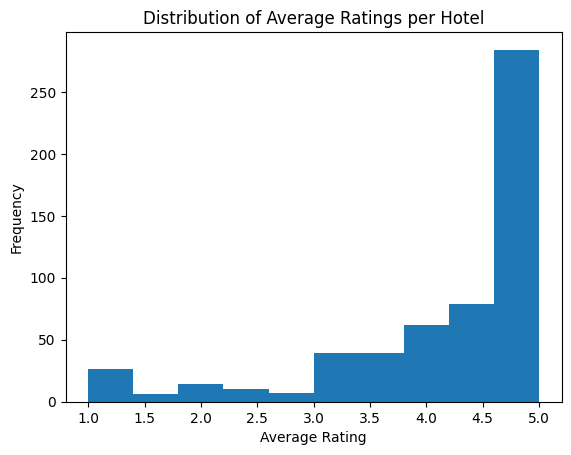

In [247]:
# Plot average rating for hotel, plot histogram of the average ratings
avg_rating_per_hotel = reviews.groupby("location_id")["rating"].mean().sort_values(ascending=False)
# histogram of average ratings
avg_rating_per_hotel.plot(kind='hist', bins=10)
plt.xlabel("Average Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Average Ratings per Hotel")
plt.show()

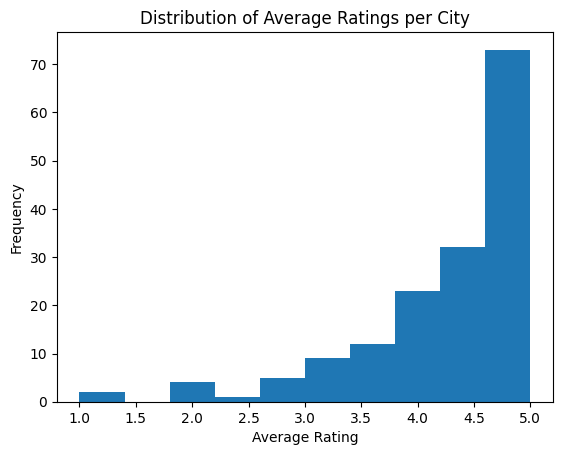

In [248]:
# Plot average rating for city, plot histogram of the average ratings
avg_rating_per_city = reviews.groupby("city")["rating"].mean().sort_values(ascending=False)
# histogram of average ratings
avg_rating_per_city.plot(kind='hist', bins=10)
plt.xlabel("Average Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Average Ratings per City")
plt.show()

In [249]:
reviews["title"].head(10)

0                         not a good stay
1                   Definitely recommend!
2                          Wonderful stay
3    My favorite 4+ star hotel in Colombo
4                 Excellent food and stay
5                             Outstanding
6                               I like it
7            Everything  is wonderful 😁😁😁
8                        Great experience
9          Very good and highly recommend
Name: title, dtype: object

In [250]:
# convert title to lowercase
reviews["title"] = reviews["title"].str.lower()

# remove all non-alphanumeric
reviews["title"] = reviews["title"].str.replace(r'[^\w\s]', '', regex=True)

# remove unnecessary whitespace
reviews["title"] = reviews["title"].str.strip()
reviews['title'] = reviews['title'].str.replace(r'\s+', ' ', regex=True)

reviews["title"].head(10)

0                        not a good stay
1                   definitely recommend
2                         wonderful stay
3    my favorite 4 star hotel in colombo
4                excellent food and stay
5                            outstanding
6                              i like it
7                everything is wonderful
8                       great experience
9         very good and highly recommend
Name: title, dtype: object

In [251]:
# convert text to lowercase
reviews["text"] = reviews["text"].str.lower()

# remove all non-alphanumeric
reviews["text"] = reviews["text"].str.replace(r'[^\w\s]', '', regex=True)

# remove unnecessary whitespace
reviews["text"] = reviews["text"].str.strip()
reviews['text'] = reviews['text'].str.replace(r'\s+', ' ', regex=True)

reviews["text"].head(10)

0    found lighters in the toilet paper rolls in a ...
1    the hotel is just excellent the food is so goo...
2    comfortable staycooperative stafffast service ...
3    we live in new york area but my spouse is fami...
4    excellent food especially indian corner lot of...
5    spotless and immaculate premises the room is s...
6    house keeping and also respition i good and ni...
7    everything was amazing the breakfast and lunch...
8    we were there last week with our family and it...
9    very accommodating staff and lovely restaurant...
Name: text, dtype: object

In [252]:
# combine title and text
reviews["review"] = reviews["title"] + " " + reviews["text"]
reviews["review"].head(10)

0    not a good stay found lighters in the toilet p...
1    definitely recommend the hotel is just excelle...
2    wonderful stay comfortable staycooperative sta...
3    my favorite 4 star hotel in colombo we live in...
4    excellent food and stay excellent food especia...
5    outstanding spotless and immaculate premises t...
6    i like it house keeping and also respition i g...
7    everything is wonderful everything was amazing...
8    great experience we were there last week with ...
9    very good and highly recommend very accommodat...
Name: review, dtype: object

In [253]:
# total number of words
reviews["review"].str.split().str.len().sum()

np.int64(481190)

In [254]:
# total number of unique words
reviews["review"].str.split().explode().nunique()

18137

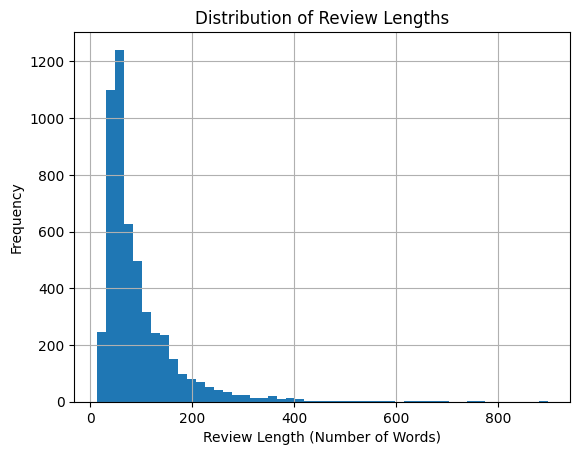

In [255]:
# distribution of review lengths
reviews["review_length"] = reviews["review"].str.split().str.len()
reviews["review_length"].hist(bins=50)
plt.xlabel("Review Length (Number of Words)")
plt.ylabel("Frequency")
plt.title("Distribution of Review Lengths")
plt.show()

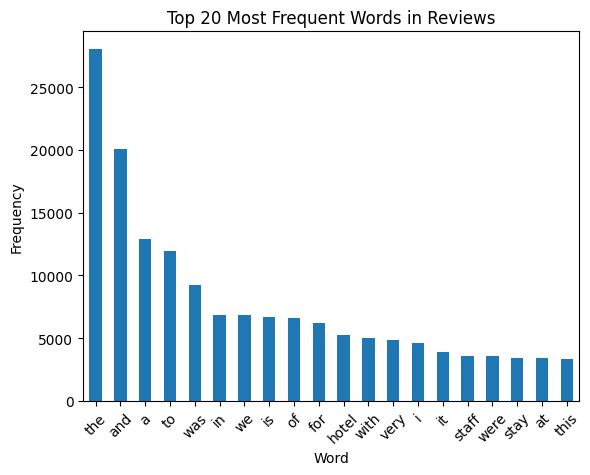

In [256]:
word_counts = reviews["review"].str.split().explode().value_counts()
word_counts.head(20).plot(kind='bar')
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Words in Reviews")
plt.xticks(rotation=45)
plt.show()

In [257]:
# remove stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab') # Also download the tokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    words = word_tokenize(text)
    return ' '.join([word for word in words if word not in stop_words])
reviews["review"] = reviews["review"].apply(remove_stopwords)
reviews["review"].head(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kanee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\kanee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


0    good stay found lighters toilet paper rolls no...
1    definitely recommend hotel excellent food good...
2    wonderful stay comfortable staycooperative sta...
3    favorite 4 star hotel colombo live new york ar...
4    excellent food stay excellent food especially ...
5    outstanding spotless immaculate premises room ...
6    like house keeping also respition good nice li...
7    everything wonderful everything amazing breakf...
8    great experience last week family great experi...
9    good highly recommend accommodating staff love...
Name: review, dtype: object

In [258]:
reviews["review"].str.split().str.len().sum()

np.int64(263408)

In [259]:
reviews["review"].str.split().explode().nunique()

17998

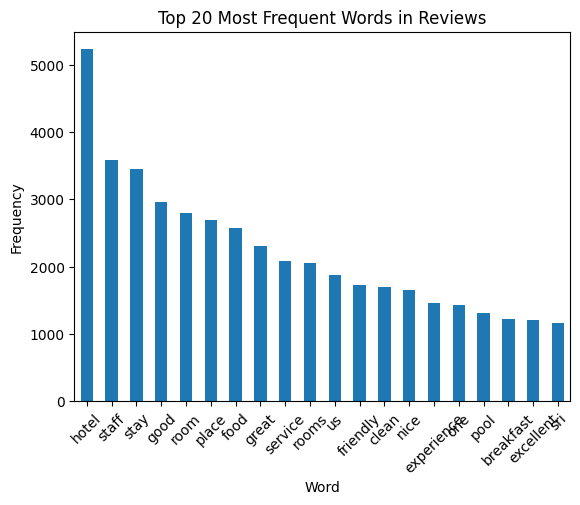

In [260]:
word_counts = reviews["review"].str.split().explode().value_counts()
word_counts.head(20).plot(kind='bar')
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Words in Reviews")
plt.xticks(rotation=45)
plt.show()

In [262]:
# save the cleaned reviews to a new csv file
reviews.to_csv("cleaned_reviews.csv", index=False)